### Startup

In [1]:
import ROOT
# from pyamptools import atiSetup
import os
os.chdir("/w/halld-scshelf2101/home/dbarton/gluex/KKpi/")
os.listdir()
# atiSetup.setup(globals(), use_fsroot=True)

Welcome to JupyROOT 6.24/04


['KKpi_event_selection.pdf',
 'archive',
 'voigtianRoo.C',
 'KKpi_resonanceSelection.C',
 'KKpi_analysis_v0.C',
 'KKpi_analysis.C',
 'KKpi_analysis.ipynb',
 'voigtian.C',
 'juliaEnvironmentSetup.ipynb',
 'KKpi_analysis_secondVoigtian.C',
 'KKpi_analysis_TYLER.py',
 'readTreeHeaders.C',
 'tree_pipkmks__B4_M16_042077.root',
 'readTreesHeaders.ipynb',
 'KKpi_flat_bestX2_2017.root',
 'KKpi_analysis.py',
 'tree_pipkmks__B4_M16_042011Headers.txt',
 'plots',
 'functionsVarious.C',
 'KKpi_columnHeaders.txt']

### Big file

In [4]:
fileName = '/w/halld-scshelf2101/home/dbarton/gluex/KKpi/KKpi_flat_bestX2_2017.root'
treeName = 'pipkmks__B4_M16'


### Branches

In [5]:
def list_trees_and_branches(fileName):
    file = ROOT.TFile.Open(fileName)
    # Loop over all keys in the file
    for key in file.GetListOfKeys():
        obj = key.ReadObj()
        # Check if the object is a tree
        if isinstance(obj, ROOT.TTree):
            tree = obj
            print(f"Tree Name: {tree.GetName()}")
            print("Branches:")
            # List all branches in the tree
            branches = tree.GetListOfBranches()
            for branch in branches:
                print(f" - {branch.GetName()}")

    # Close the file
    file.Close()

list_trees_and_branches(fileName)


Tree Name: pipkmks__B4_M16
Branches:
 - run
 - event
 - trigbits
 - rftime
 - kin_chisq
 - kin_ndf
 - beam_beamid
 - beam_x4_meas
 - beam_p4_meas
 - beam_x4_kin
 - beam_p4_kin
 - pip1_trkid
 - pip1_x4_meas
 - pip1_p4_meas
 - pip1_x4_kin
 - pip1_p4_kin
 - pip1_pid_fom
 - pip1_beta_time
 - pip1_chisq_time
 - pip1_ndf_time
 - pip1_ndf_trk
 - pip1_chisq_trk
 - pip1_ndf_dedx
 - pip1_chisq_dedx
 - pip1_dedx_cdc
 - pip1_dedx_fdc
 - pip1_dedx_tof
 - pip1_dedx_st
 - pip1_ebcal
 - pip1_eprebcal
 - pip1_efcal
 - pip1_bcal_delphi
 - pip1_bcal_delz
 - pip1_fcal_doca
 - km_trkid
 - km_x4_meas
 - km_p4_meas
 - km_x4_kin
 - km_p4_kin
 - km_pid_fom
 - km_beta_time
 - km_chisq_time
 - km_ndf_time
 - km_ndf_trk
 - km_chisq_trk
 - km_ndf_dedx
 - km_chisq_dedx
 - km_dedx_cdc
 - km_dedx_fdc
 - km_dedx_tof
 - km_dedx_st
 - km_ebcal
 - km_eprebcal
 - km_efcal
 - km_bcal_delphi
 - km_bcal_delz
 - km_fcal_doca
 - p_trkid
 - p_x4_meas
 - p_p4_meas
 - p_x4_kin
 - p_p4_kin
 - p_pid_fom
 - p_beta_time
 - p_chisq_ti

### Create Dataframe \& columns for all particles.

In [6]:
import numpy as np
import ROOT
ROOT.EnableImplicitMT() # Enable multi-threading

def buildDataFrame(fileName, treeName):
    df = ROOT.RDataFrame(treeName, fileName)

    df = df.Define('p_m', 'TMath::Sqrt(p_E*p_E - p_px*p_px - p_py*p_py - p_pz*p_pz)') \
           .Define('p_m2', 'p_E*p_E - p_px*p_px - p_py*p_py - p_pz*p_pz') \
           .Define('pip2_m2', 'pip2_E*pip2_E - pip2_px*pip2_px - pip2_py*pip2_py - pip2_pz*pip2_pz') \
           .Define('pip2_m', 'TMath::Sqrt(pip2_E*pip2_E - pip2_px*pip2_px - pip2_py*pip2_py - pip2_pz*pip2_pz)') \
           .Define('pim_m2', 'pim_E*pim_E - pim_px*pim_px - pim_py*pim_py - pim_pz*pim_pz') \
           .Define('pim_m', 'TMath::Sqrt(pim_E*pim_E - pim_px*pim_px - pim_py*pim_py - pim_pz*pim_pz)') \
           .Define('ks_E', 'pip2_E + pim_E') \
           .Define('ks_px', 'pip2_px + pim_px') \
           .Define('ks_py', 'pip2_py + pim_py') \
           .Define('ks_pz', 'pip2_pz + pim_pz') \
           .Define('ks_m', 'TMath::Sqrt(ks_E*ks_E - ks_px*ks_px - ks_py*ks_py - ks_pz*ks_pz)') \
           .Define('ks_m2', 'ks_E*ks_E - ks_px*ks_px - ks_py*ks_py - ks_pz*ks_pz') \
           .Define('delta_E', 'pip1_E + p_E') \
           .Define('delta_px', 'pip1_px + p_px') \
           .Define('delta_py', 'pip1_py + p_py') \
           .Define('delta_pz', 'pip1_pz + p_pz') \
           .Define('delta_m', 'TMath::Sqrt(delta_E*delta_E - delta_px*delta_px - delta_py*delta_py - delta_pz*delta_pz)') \
           .Define('delta_m2', 'delta_E*delta_E - delta_px*delta_px - delta_py*delta_py - delta_pz*delta_pz') \
           .Define('lambda_E', 'p_E + km_E') \
           .Define('lambda_px', 'p_px + km_px') \
           .Define('lambda_py', 'p_py + km_py') \
           .Define('lambda_pz', 'p_pz + km_pz') \
           .Define('lambda_m', 'TMath::Sqrt(lambda_E*lambda_E - lambda_px*lambda_px - lambda_py*lambda_py - lambda_pz*lambda_pz)') \
           .Define('lambda_m2', 'lambda_E*lambda_E - lambda_px*lambda_px - lambda_py*lambda_py - lambda_pz*lambda_pz') \
           .Define('kmpip1_E', 'pip1_E + km_E') \
           .Define('kmpip1_px', 'pip1_px + km_px') \
           .Define('kmpip1_py', 'pip1_py + km_py') \
           .Define('kmpip1_pz', 'pip1_pz + km_pz') \
           .Define('kmpip1_m', 'TMath::Sqrt(kmpip1_E*kmpip1_E - kmpip1_px*kmpip1_px - kmpip1_py*kmpip1_py - kmpip1_pz*kmpip1_pz)') \
           .Define('kmpip1_m2', 'kmpip1_E*kmpip1_E - kmpip1_px*kmpip1_px - kmpip1_py*kmpip1_py - kmpip1_pz*kmpip1_pz') \
           .Define('kspip1_E', 'pip1_E + ks_E') \
           .Define('kspip1_px', 'pip1_px + ks_px') \
           .Define('kspip1_py', 'pip1_py + ks_py') \
           .Define('kspip1_pz', 'pip1_pz + ks_pz') \
           .Define('kspip1_m', 'TMath::Sqrt(kspip1_E*kspip1_E - kspip1_px*kspip1_px - kspip1_py*kspip1_py - kspip1_pz*kspip1_pz)') \
           .Define('kspip1_m2', 'kspip1_E*kspip1_E - kspip1_px*kspip1_px - kspip1_py*kspip1_py - kspip1_pz*kspip1_pz') \
           .Define('KKpi_E', 'pip1_E + km_E + ks_E') \
           .Define('KKpi_px', 'pip1_px + km_px + ks_px') \
           .Define('KKpi_py', 'pip1_py + km_py + ks_py') \
           .Define('KKpi_pz', 'pip1_pz + km_pz + ks_pz') \
           .Define('KKpi_m', 'TMath::Sqrt(KKpi_E*KKpi_E - KKpi_px*KKpi_px - KKpi_py*KKpi_py - KKpi_pz*KKpi_pz)') \
           .Define('KKpi_m2', 'KKpi_E*KKpi_E - KKpi_px*KKpi_px - KKpi_py*KKpi_py - KKpi_pz*KKpi_pz') \
           .Define('KsProt_E', 'p_E + ks_E') \
           .Define('KsProt_px', 'p_px + ks_px') \
           .Define('KsProt_py', 'p_py + ks_py') \
           .Define('KsProt_pz', 'p_pz + ks_pz') \
           .Define('KsProt_m', 'TMath::Sqrt(KsProt_E*KsProt_E - KsProt_px*KsProt_px - KsProt_py*KsProt_py - KsProt_pz*KsProt_pz)') \
           .Define('KsProt_m2', 'KsProt_E*KsProt_E - KsProt_px*KsProt_px - KsProt_py*KsProt_py - KsProt_pz*KsProt_pz')
    
    numLines = df.Count().GetValue()
    print("Number of lines in dataframe: {:,}".format(numLines))

    return df

dfKKpi = buildDataFrame(fileName, treeName)


Number of lines in dataframe: 5,834,554


### Define Cuts

In [25]:
# Define cuts

pathlength_sig = 'pathlength_sig > 5' # pathlength significance cut
reject_delta = 'delta_m > 1.4' # delta++ cut
reject_lambda = 'lambda_m > 1.9' # lambda cut
select_kstar_plus = 'kspip1_m >= 0.8 && kspip1_m <= 1.0' # "charged" K*(KsPi+)
select_kstar_neutral = 'kmpip1_m >= 0.8 && kmpip1_m <= 1.0' # "neutral" K*(K-Pi+)
reject_kstar_plus = 'kspip1_m <= 0.8 || kspip1_m >= 1.0' # Reject "charged" K*(KsPi+)
reject_kstar_neutral = 'kmpip1_m <= 0.8 || kmpip1_m >= 1.0' # Reject "neutral" K*(K-Pi+)
select_kShort = 'ks_m >= 0.49 && ks_m <= 0.51' # Select kShort
reject_kShort = 'ks_m <= 0.45 || ks_m >= 0.55' # Reject kShort
select_KKpi = 'KKpi_m >= 1.0 && KKpi_m <= 1.8' # Select KKpi
select_proton = 'p_m >= 0.8 && p_m <= 1.2' # Select proton



### Histogram - kShort

In [ ]:
from IPython.display import Image, display

def analysis(df):

    ######## APPLY CUTS ########
    dfFiltered = df.Filter(pathlength_sig).Filter(select_kShort) \
    ############################

    canvas = ROOT.TCanvas("c", "c", 800, 600)
    h1 = dfFiltered.Histo1D(('ks_m', 'ks_m', 80, 0.3, 0.7), 'ks_m')
    h1.SetStats(False)
    h1.Draw()

    img_path = "../_plots/_TESThistogram.png"
    canvas.SaveAs(img_path)  # Saves the canvas as an image
    canvas.Close()

    display(Image(filename=img_path))


analysis(dfKKpi)


### Ks Proton

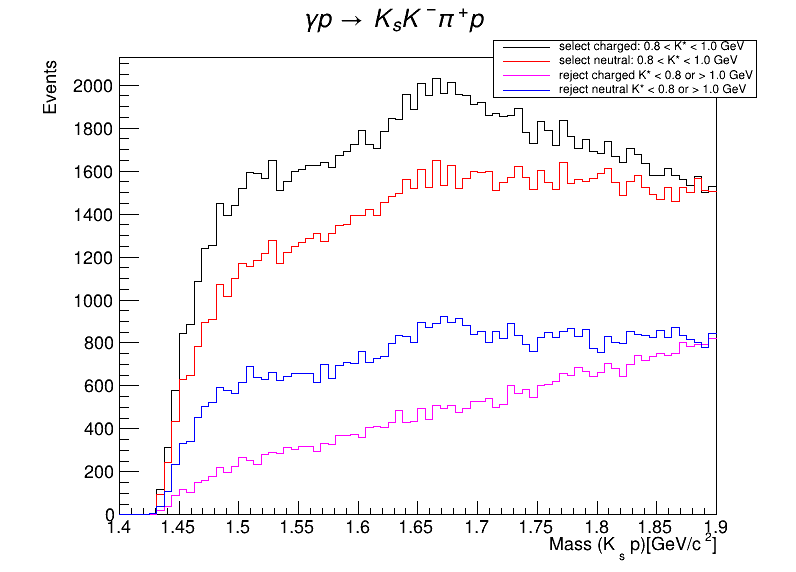

Info in <TCanvas::Print>: pdf file plots/KsProton_m.pdf has been created
Info in <TCanvas::Print>: png file plots/KsProton_m.png has been created


In [68]:
from IPython.display import Image, display
latex = ROOT.TLatex()

plotTitle = '\gamma p \\rightarrow K_{s} K^{-} \pi^{+} p'
axisLabel = 'Mass (K_{s} p)'

def plot_hist(df):

    canvas = ROOT.TCanvas('c', 'c', 800, 600)
    # split canvas into two pads
    canvas.Divide(1, 1)
    canvas.SetLeftMargin(0.15)
    
    dfFiltered = df.Filter(select_kShort).Filter(select_proton).Filter(reject_delta).Filter(reject_lambda).Filter(reject_kstar_plus)
    dfFiltered2 = df.Filter(select_kShort).Filter(select_proton).Filter(reject_delta).Filter(reject_lambda).Filter(reject_kstar_neutral)
    dfFiltered3 = df.Filter(select_kShort).Filter(select_proton).Filter(reject_delta).Filter(reject_lambda).Filter(select_kstar_plus)
    dfFiltered4 = df.Filter(select_kShort).Filter(select_proton).Filter(reject_delta).Filter(reject_lambda).Filter(select_kstar_neutral)
    
    h1 = dfFiltered.Histo1D(('KsProt_m', 'KsProt_m', 80, 1.4, 1.9), 'KsProt_m')
    h1.SetTitle(plotTitle)
    h1.SetStats(False)
    h1.SetLineColor(ROOT.kBlack)
    h1.GetXaxis().SetTitle(axisLabel + '[GeV/c^{2}]')
    h1.GetYaxis().SetTitle('Events')
    h1.Draw('hist')

    
    h2 = dfFiltered2.Histo1D(('KsProt_m', 'KsProt_m', 80, 1.4, 1.9), 'KsProt_m')
    h2.SetStats(False)
    h2.SetTitle(plotTitle)
    h2.SetLineColor(ROOT.kRed)
    h2.GetXaxis().SetTitle(axisLabel + '[GeV/c^{2}]')
    h2.GetYaxis().SetTitle('Events')
    h2.Draw('same')

    h3 = dfFiltered3.Histo1D(('KsProt_m', 'KsProt_m', 80, 1.4, 1.9), 'KsProt_m')
    h3.SetStats(False)
    h3.SetTitle(plotTitle)
    h3.SetLineColor(ROOT.kMagenta)
    h3.GetXaxis().SetTitle(axisLabel + '[GeV/c^{2}]')
    h3.GetYaxis().SetTitle('Events')
    h3.Draw('same')

    h4 = dfFiltered4.Histo1D(('KsProt_m', 'KsProt_m', 80, 1.4, 1.9), 'KsProt_m')
    h4.SetStats(False)
    h4.SetTitle(plotTitle)
    h4.SetLineColor(ROOT.kBlue)
    h4.GetXaxis().SetTitle(axisLabel + '[GeV/c^{2}]')
    h4.GetYaxis().SetTitle('Events')
    h4.Draw('same')

    legend1 = ROOT.TLegend(0.62, 0.83, 0.95, 0.93) # x_left, y_bottom, x_right, y_top
    legend1.AddEntry(h1.GetValue(), 'select charged: 0.8 < K* < 1.0 GeV', 'l')
    legend1.AddEntry(h2.GetValue(), 'select neutral: 0.8 < K* < 1.0 GeV', 'l')
    legend1.AddEntry(h3.GetValue(), 'reject charged K* < 0.8 or > 1.0 GeV', 'l')
    legend1.AddEntry(h4.GetValue(), 'reject neutral K* < 0.8 or > 1.0 GeV', 'l')
    # legend1.SetTextFont(2)
    legend1.SetTextSize(0.022)
    legend1.Draw('same')

    img_path = 'plots/KsProton_m'
    canvas.SaveAs(img_path + '.pdf')
    canvas.SaveAs(img_path + '.png')
    canvas.Close()
    display(Image(filename=img_path + '.png'))
    os.remove(img_path + '.png')

plot_hist(dfKKpi)

### Histogram - kShort & pim & pip2

In [ ]:
from IPython.display import Image, display

def analysis(df):

    ######## APPLY CUTS ########
    dfFiltered = df
    ############################

    min_height = -50
    max_height = 7000000

    canvas = ROOT.TCanvas("c1", "c1", 800, 600)
    canvas.Divide(2, 2)

    canvas.cd(1)
    h1 = dfFiltered.Histo1D(('ks_m', 'ks_m_NO_CUTS', 60, 0.01, 1.0), 'ks_m') # arguments: (name, title, bins, min, max), columnVariable
    h1.SetLineColor(ROOT.kBlue)
    h1.SetMinimum(min_height)
    h1.SetMaximum(1000000)
    h1.SetStats(False)
    h1.GetXaxis().SetTitle('[GeV/c^{2}]')
    h1.Draw()
    legend1 = ROOT.TLegend(0.8, 0.80, 0.95, 0.95)
    legend1.AddEntry(h1.GetValue(), 'ks_m', 'l')
    legend1.Draw('same')

    canvas.cd(2)
    h2 = dfFiltered.Histo1D(('pip2_m', 'mc_pip2_m', 60, 0.01, 1.0), 'pip2_m')
    h2.SetLineColor(ROOT.kBlack)
    h2.SetMinimum(min_height)
    h2.SetMaximum(max_height)
    h2.SetStats(False)
    h2.GetXaxis().SetTitle('[GeV/c^{2}]')
    h2.Draw('same')
    legend2 = ROOT.TLegend(0.8, 0.80, 0.95, 0.95)
    legend2.AddEntry(h2.GetValue(), 'pip2_m', 'l')
    legend2.Draw('same')

    canvas.cd(3)
    h3 = dfFiltered.Histo1D(('pim_m', 'mc_pim_m', 60, 0.01, 1.0), 'pim_m')
    h3.SetLineColor(ROOT.kMagenta)
    h3.SetMinimum(min_height)
    h3.SetMaximum(max_height)
    h3.SetStats(False)
    h3.GetXaxis().SetTitle('[GeV/c^{2}]')
    h3.Draw('same')
    legend3 = ROOT.TLegend(0.8, 0.80, 0.95, 0.95)
    legend3.AddEntry(h3.GetValue(), 'pim_m', 'l')
    legend3.Draw('same')

    canvas.cd(4)
    h4 = dfFiltered.Histo1D(('ks_m', 'ks_m', 60, 0.01, 1.0), 'ks_m')
    h4.SetLineColor(ROOT.kBlue)
    h4.SetMinimum(min_height)
    h4.SetMaximum(max_height)
    h4.SetStats(False)
    h4.GetXaxis().SetTitle('[GeV/c^{2}]')
    h4.Draw('same')
    h5 = dfFiltered.Histo1D(('pip2_m', 'mc_pip2_m', 60, 0.01, 1.0), 'pip2_m')
    h5.SetLineColor(ROOT.kBlack)
    h5.SetMinimum(min_height)
    h5.SetMaximum(max_height)
    h5.SetStats(False)
    h5.Draw('same')
    h6 = dfFiltered.Histo1D(('pim_m', 'pim_m', 60, 0.01, 1.0), 'pim_m')
    h6.SetLineColor(ROOT.kMagenta)
    h6.SetMinimum(min_height)
    h6.SetMaximum(max_height)
    h6.SetStats(False)
    h6.Draw('same')
    legend4 = ROOT.TLegend(0.8, 0.80, 0.95, 0.95) # xLeft, yBottom, xRight, yTop
    legend4.AddEntry(h4.GetValue(), 'ks_m', 'l')
    legend4.AddEntry(h5.GetValue(), 'pip2_m', 'l')
    legend4.AddEntry(h6.GetValue(), 'pim_m', 'l')
    legend4.Draw('same')

    canvas.cd(0)
    title = ROOT.TLatex()
    title.SetNDC()
    title.SetTextFont(42)
    title.SetTextSize(0.04)
    title.DrawLatex(0.5, 0.95, "mc")

    img_path = "../_plots/KShortPip2Pim.png"
    canvas.SaveAs(img_path)  # Saves the canvas as an image
    canvas.Close()

    display(Image(filename=img_path))


analysis(dfKKpi)


### Histogram - KK $\pi$

In [ ]:
from IPython.display import Image, display

def plotting(df):
    
    ######## APPLY CUTS ########
    dfFiltered = df.Filter(keep_kstar_plus).Filter(reject_kstar_zero).Filter(select_kShort).Filter(pathlength_sig).Filter(reject_delta).Filter(reject_lambda)
    ############################

    canvas = ROOT.TCanvas("c", "c", 800, 600)
    h1 = dfFiltered.Histo1D(('KKpi_m', 'KKpi', 60, 1.0, 1.8), 'KKpi_m')
    h1.SetStats(False)
    h1.Draw()
    
    img_path = "../_plots/KKpi.png"
    canvas.SaveAs(img_path)
    canvas.Close()

    # Display the saved image
    display(Image(filename=img_path))

plotting(dfKKpi)

### Dalitz Plots - (kShort  +  $\pi^{+}$) vs. (kMinus + $\pi^{+}$)

In [ ]:
from IPython.display import Image, display

def dalitzPlot(df):
    
    ######## APPLY CUTS ########
    dfFiltered = df.Filter(pathlength_sig).Filter(select_KKpi)
    ############################

    h2 = dfFiltered.Histo2D(('DalitzPlot', 'DalitzPlot', 60, 0.1, 1.4, 60, 0.1, 1.4), 'kspip1_m2', 'kmpip1_m2')
    canvas = ROOT.TCanvas("c", "c", 800, 600)
    h2.SetStats(False)
    h2.Draw("colz")
    canvas.Update()
    
    img_path = "../_plots/_dalitzTEST.png"
    canvas.SaveAs(img_path)
    canvas.Draw()
    # canvas.Close()
    

    # # Display the saved image
    display(Image(filename=img_path))

dalitzPlot(dfKKpi)

### Fitting: define functions

In [ ]:
# Create various functions from 'ROOT' framework for fitting to histograms

# Breit-Wigner function
bw = ROOT.TF1("bw", "breitwigner(0)", 1.2, 1.7); # used to have BreitWigner(x, [4], [5])
# bw = ROOT.TF1("bw", "TMath::BreitWigner(x, [0], [1])", 0.4, 0.6)

# Exponential
exp = ROOT.TF1("exp", "TMath::Exp([0] + [1] * x + [2] * x * x)", 1.2, 1.7) # old c++ code defines this exponential as 'bkg'
exp.SetParName(0, "expPar1")
exp.SetParName(1, "expPar2")
exp.SetParName(2, "expPar3")

# Voigtian function
voigtian = ROOT.TF1("voigtian", "[0]*TMath::Voigt(x - [1], [2], [3])", 1.2, 1.7)
voigtian.SetParName(0, "voigtian_amplitude")
voigtian.SetParName(1, "voigtian_mean") # 'mean' is the offset that places the peak at the correct position, where we know the resonance to be.  It represents the particles mass.
voigtian.SetParName(2, "voigtian_sigma") # 'sigma' is the gaussian width (detector resolution)
voigtian.SetParName(3, "voigtian_width") # ?? 'width' is the lorentzian width (natural width of the particle) ??

# Voigtian with RooVoigtian
# ???

######## COMBINED FUNCTIONS ########

# Voigtian + Exponential(3 parameters)
voigtian_plus_exp = ROOT.TF1("voigt_plus_expo3", "voigtian + exp", 0.1, 1.8)
voigtian_plus_exp.SetParameter(0, 4.5E2)
voigtian_plus_exp.SetParameter(1, 1.45807E0)
voigtian_plus_exp.SetParameter(2, 1.0E-02)
voigtian_plus_exp.SetParameter(3, 3.81110E-06)
voigtian_plus_exp.SetParameter(4, -6.47E0)
voigtian_plus_exp.SetParameter(5, 9.29E0)
voigtian_plus_exp.SetParameter(6, -2.970E0)

### Fitting: plots

In [ ]:
# Change all my code to lazy execution, i.e. no functions, instead just put histos in a cell, then drawing, etc, in another cell

from IPython.display import Image, display

def fitting(df):
    
    ######## APPLY CUTS ########
    dfFiltered = df.Filter(keep_kstar_plus).Filter(reject_kstar_zero).Filter(select_kShort).Filter(pathlength_sig).Filter(reject_delta).Filter(reject_lambda)
    ############################

    canvas = ROOT.TCanvas("c", "c", 800, 600)
    h1 = dfFiltered.Histo1D(('KKpi_m', 'KKpi', 60, 1.0, 1.8), 'KKpi_m')
    h1.SetStats(False)
    h1.Fit(voigtian_plus_exp, "RV")
    h1.Draw()
    voigtian_plus_exp.Draw("same")
    
    img_path = "../_plots/_KKpi_FIT_TEST.png"
    canvas.SaveAs(img_path)
    canvas.Close()

    # Display the saved image
    display(Image(filename=img_path))

fitting(dfKKpi)